In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from zipline.api import order_target, record, symbol
from zipline.examples import buyapple

In [2]:
%load_ext zipline
%matplotlib inline

### Data access using zipline

[2018-10-29 19:48:37.885246] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2018-10-29 19:44:13.666439+00:00.
[2018-10-29 19:50:41.926327] INFO: zipline.finance.metrics.tracker: Simulated 2013 trading days
first open: 2010-01-04 14:31:00+00:00
last close: 2017-12-29 21:00:00+00:00


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,0.0,NaN,-0.004967,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,0.0,0.0,NaN,-0.009909,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,0.0,0.0,NaN,-0.014826,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,0.0,0.0,NaN,-0.019720,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,0.0,0.0,NaN,-0.024588,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,0.0,0.0,NaN,-0.029433,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,0.0,0.0,NaN,-0.034254,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,0.0,0.0,NaN,-0.039050,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,0.0,0.0,NaN,-0.043823,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,0.0,0.0,NaN,-0.048572,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


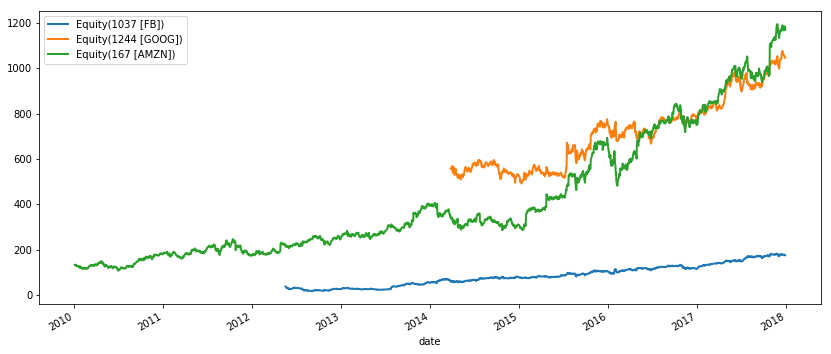

In [7]:
%%zipline --start 2010-1-1 --end 2018-1-1 --data-frequency daily
from zipline.api import order_target, record, symbol
import pandas as pd

def initialize(context):
    context.i = 0
    context.assets = [symbol('FB'), symbol('GOOG'), symbol('AMZN')]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.to_frame().reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volumne']
        df.to_csv('stock_data.csv', index=False)
    else:
        df.to_csv('stock_data.csv', index=False, mode='a', header=None)
    context.i += 1

df = pd.read_csv('stock_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(14, 6));

### Simple moving average strategy

/home/stefan/.pyenv/versions/at-3.6/lib/python3.6/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/stefan/.pyenv/versions/at-3.6/lib/python3.6/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


[2018-10-29 19:47:01.345263] INFO: zipline.finance.metrics.tracker: Simulated 1007 trading days
first open: 2014-01-02 14:31:00+00:00
last close: 2017-12-29 21:00:00+00:00


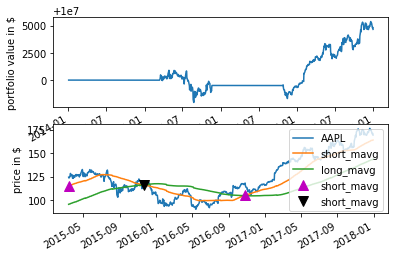

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.009583,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.009773,0.105425,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.012616,0.076804,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.006552,0.103394,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.006335,0.090494,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005685,0.081882,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.002978,0.077910,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.016271,0.102267,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005523,0.117690,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.000162,0.114950,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [6]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show() 